In [1]:
# Fundamental environment setup
import matplotlib
import numpy as np
import psutil
import seaborn as sns
import copy
import urllib.request
import sklearn.datasets
import matplotlib.pyplot as plt
import numpy.linalg as la
from scipy.sparse import csc_matrix, csr_matrix
from sklearn.datasets import load_svmlight_file, fetch_rcv1

sns.set(style="whitegrid", context="talk", font_scale=1.2, palette=sns.color_palette("bright"), color_codes=False)
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['font.family'] = 'sans-serif'
matplotlib.rcParams['font.sans-serif'] = 'DejaVu Sans'
matplotlib.rcParams['mathtext.fontset'] = 'cm'
matplotlib.rcParams['figure.figsize'] = (9, 6)

'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp
'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp


100 100 100 100


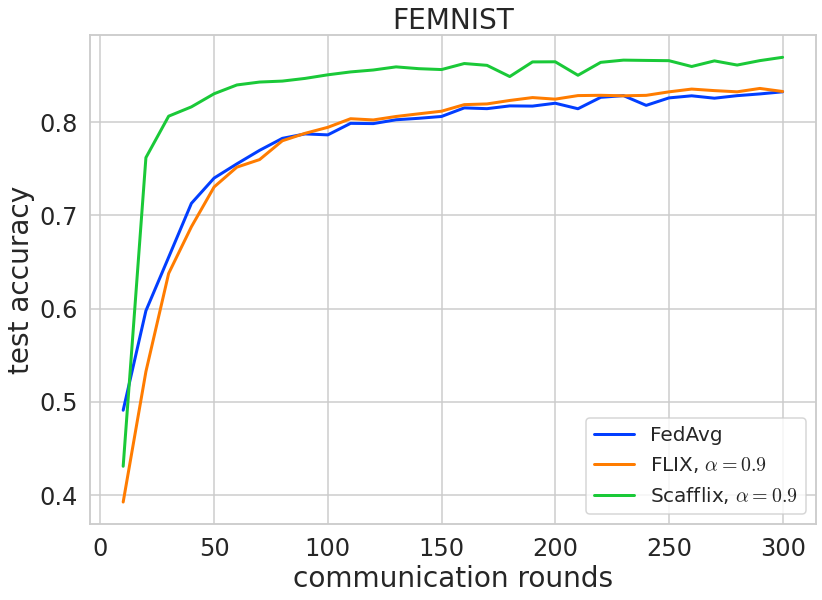

In [122]:
p = 0.2
max_rounds = 1000

# input_name = '../logs/v1_30points/0110.txt'
# file_name = input_name.split('/')[-1].split('.')[0]

# def mapping_list(file_name):
#     if file_name in ['0001', '0006', '0101', '0106']: alpha = 0.1
#     if file_name in ['0002', '0007', '0102', '0107']: alpha = 0.3
#     if file_name in ['0003', '0008', '0103', '0108']: alpha = 0.5
#     if file_name in ['0004', '0009', '0104', '0109']: alpha = 0.7
#     if file_name in ['0005', '0010', '0105', '0110']: alpha = 0.9
#     return alpha

input_name = '../logs/0110.txt'
file_name = input_name.split('/')[-1].split('.')[0]

def mapping_list(file_name):
    if file_name in ['0001', '0006', '0101', '0106']: alpha = 0.1
    if file_name in ['0002', '0007', '0102', '0107']: alpha = 0.3
    if file_name in ['0003', '0008', '0103', '0108']: alpha = 0.5
    if file_name in ['0004', '0009', '0104', '0109']: alpha = 0.7
    if file_name in ['0005', '0010', '0105', '0110']: alpha = 0.9
    return alpha


alpha = mapping_list(file_name)



with open(input_name, 'r') as minput:
    flix1 = minput.readline().split(',')
    fedavg1 = minput.readline().split(',')
    scafflix1 = minput.readline().split(',')
    flix1 = [float(i) for i in flix1]
    fedavg1 = [float(i) for i in fedavg1]
    scafflix1 = [float(i) for i in scafflix1]
    
# print(len(flix1), len(fedavg1), len(scafflix1))

mlen = min(len(flix1), len(fedavg1), len(scafflix1))
round_nums = np.linspace(int(max_rounds / mlen), max_rounds, num=mlen, endpoint=True)
# round_nums = np.arange(int(max_rounds / mlen), max_rounds + int(max_rounds / mlen), int(max_rounds / mlen))

flix = flix1[0:len(flix1):int(len(flix1)/mlen)]
fedavg = fedavg1[0:len(fedavg1):int(len(fedavg1)/mlen)]
interval = int(1 / p) 
scafflix = scafflix1[0:len(scafflix1):int(len(scafflix1)/mlen)]

print(len(flix), len(fedavg), len(scafflix), len(round_nums))



size = 30
markevery = 2
plot_nums = 100
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['xtick.labelsize'] = 24  # 40
plt.rcParams['ytick.labelsize'] = 24  # 40
plt.rcParams['legend.fontsize'] = 20  # 30
plt.rcParams['axes.titlesize'] = 28  # 40
plt.rcParams['axes.labelsize'] = 28  # 40
plt.rcParams["figure.figsize"] = [13, 9]
plt.ylabel('test accuracy')
plt.xlabel('communication rounds')
# plt.yticks(range(0,1))
# plt.yscale('log')
# plt.xscale('log')
plt.title(fr"FEMNIST")
# plt.legend()
plt.grid(visible=True)
markevery = 100
# plt.yticks(np.arange(0, 1, 0.2))

start, end = 0, plot_nums-70
plt.plot(round_nums[start:end], fedavg[start:end], label=fr'FedAvg')
plt.plot(round_nums[start:end], flix[start:end], label=fr'FLIX, $\alpha={alpha}$')
plt.plot(round_nums[start:end], scafflix[start:end], label=fr'Scafflix, $\alpha={alpha}$')

plt.legend()
plt.savefig(f'100_{file_name}.pdf')
plt.show()
plt.close()

85 85 50 50


'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp
'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp


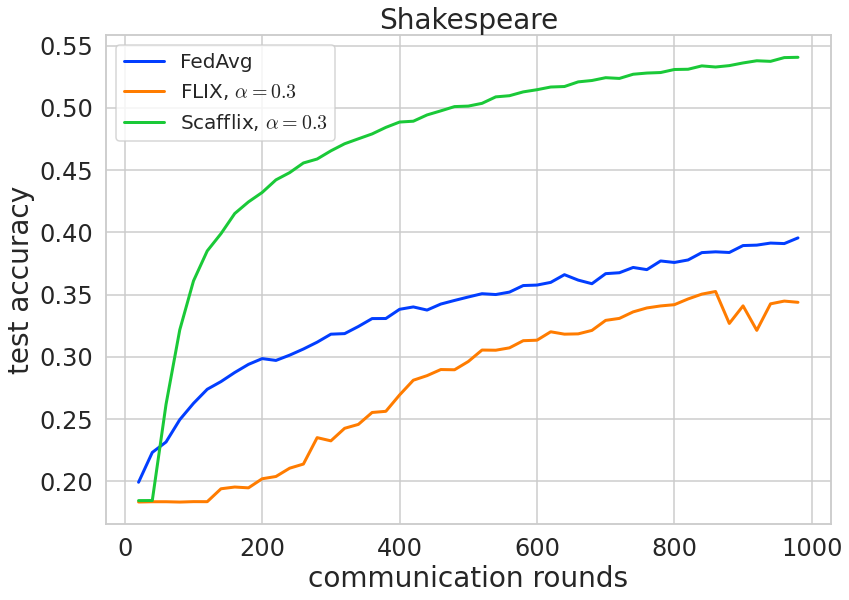

In [2]:
p = 0.2
max_rounds = 1000

# input_name = '../logs/v1_30points/0110.txt'
# file_name = input_name.split('/')[-1].split('.')[0]

# def mapping_list(file_name):
#     if file_name in ['0001', '0006', '0101', '0106']: alpha = 0.1
#     if file_name in ['0002', '0007', '0102', '0107']: alpha = 0.3
#     if file_name in ['0003', '0008', '0103', '0108']: alpha = 0.5
#     if file_name in ['0004', '0009', '0104', '0109']: alpha = 0.7
#     if file_name in ['0005', '0010', '0105', '0110']: alpha = 0.9
#     return alpha

input_name = '../logs/1107.txt'
file_name = input_name.split('/')[-1].split('.')[0]

def mapping_list(file_name):
    if file_name in ['0001', '0006', '0101', '0106', '1106']: alpha = 0.1
    if file_name in ['0002', '0007', '0102', '0107', '1107']: alpha = 0.3
    if file_name in ['0003', '0008', '0103', '0108', '1108']: alpha = 0.5
    if file_name in ['0004', '0009', '0104', '0109', '1109']: alpha = 0.7
    if file_name in ['0005', '0010', '0105', '0110', '1110']: alpha = 0.9
    return alpha


alpha = mapping_list(file_name)



with open(input_name, 'r') as minput:
    flix1 = minput.readline().split(',')
    fedavg1 = minput.readline().split(',')
    scafflix1 = minput.readline().split(',')
    flix1 = [float(i) for i in flix1]
    fedavg1 = [float(i) for i in fedavg1]
    scafflix1 = [float(i) for i in scafflix1]
    
# print(len(flix1), len(fedavg1), len(scafflix1))

flix1, fedavg1 = flix1[15:], fedavg1[15:]
mlen = min(len(flix1), len(fedavg1), len(scafflix1))
mlen = 50
round_nums = np.linspace(int(max_rounds / mlen), max_rounds, num=mlen, endpoint=True)
# round_nums = np.arange(int(max_rounds / mlen), max_rounds + int(max_rounds / mlen), int(max_rounds / mlen))

flix = flix1[0:len(flix1):int(len(flix1)/mlen)]
fedavg = fedavg1[0:len(fedavg1):int(len(fedavg1)/mlen)]
interval = int(1 / p) 
scafflix = scafflix1[0:len(scafflix1):int(len(scafflix1)/mlen)]

print(len(flix), len(fedavg), len(scafflix), len(round_nums))



size = 30
markevery = 2
plot_nums = 100
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['xtick.labelsize'] = 24  # 40
plt.rcParams['ytick.labelsize'] = 24  # 40
plt.rcParams['legend.fontsize'] = 20  # 30
plt.rcParams['axes.titlesize'] = 28  # 40
plt.rcParams['axes.labelsize'] = 28  # 40
plt.rcParams["figure.figsize"] = [13, 9]
plt.ylabel('test accuracy')
plt.xlabel('communication rounds')
# plt.yticks(range(0,1))
# plt.yscale('log')
# plt.xscale('log')
plt.title(fr"Shakespeare")
# plt.legend()
plt.grid(visible=True)
markevery = 100
# plt.yticks(np.arange(0, 1, 0.2))

start, end = 0, mlen-1
plt.plot(round_nums[start:end], fedavg[start:end], label=fr'FedAvg')
plt.plot(round_nums[start:end], flix[start:end], label=fr'FLIX, $\alpha={alpha}$')
plt.plot(round_nums[start:end], scafflix[start:end], label=fr'Scafflix, $\alpha={alpha}$')

plt.legend()
plt.savefig(f'ss_{file_name}.pdf')
plt.show()
plt.close()

'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp
'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp


85 85 50 50


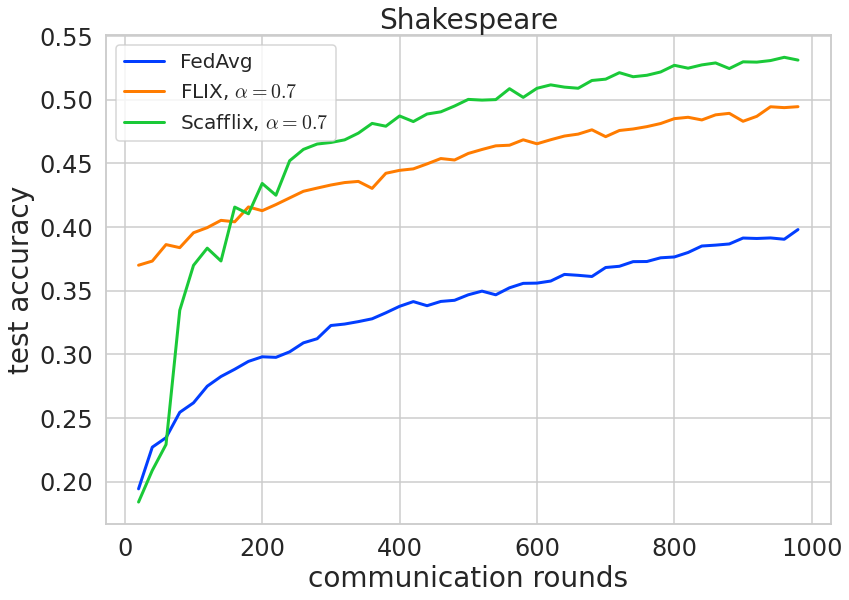

In [15]:
p = 0.2
max_rounds = 1000

# input_name = '../logs/v1_30points/0110.txt'
# file_name = input_name.split('/')[-1].split('.')[0]

# def mapping_list(file_name):
#     if file_name in ['0001', '0006', '0101', '0106']: alpha = 0.1
#     if file_name in ['0002', '0007', '0102', '0107']: alpha = 0.3
#     if file_name in ['0003', '0008', '0103', '0108']: alpha = 0.5
#     if file_name in ['0004', '0009', '0104', '0109']: alpha = 0.7
#     if file_name in ['0005', '0010', '0105', '0110']: alpha = 0.9
#     return alpha

input_name = '../logs/01104.txt'
file_name = input_name.split('/')[-1].split('.')[0]

def mapping_list(file_name):
    if file_name in ['0001', '0006', '0101', '0106', '01106', '01101']: alpha = 0.1
    if file_name in ['0002', '0007', '0102', '0107', '01107', '01102']: alpha = 0.3
    if file_name in ['0003', '0008', '0103', '0108', '01108', '01103']: alpha = 0.5
    if file_name in ['0004', '0009', '0104', '0109', '01109', '01104']: alpha = 0.7
    if file_name in ['0005', '0010', '0105', '0110', '01110', '01105']: alpha = 0.9
    return alpha


alpha = mapping_list(file_name)



with open(input_name, 'r') as minput:
    flix1 = minput.readline().split(',')
    fedavg1 = minput.readline().split(',')
    scafflix1 = minput.readline().split(',')
    flix1 = [float(i) for i in flix1]
    fedavg1 = [float(i) for i in fedavg1]
    scafflix1 = [float(i) for i in scafflix1]
    
# print(len(flix1), len(fedavg1), len(scafflix1))

flix1, fedavg1 = flix1[15:], fedavg1[15:]
mlen = min(len(flix1), len(fedavg1), len(scafflix1))
mlen = 50
round_nums = np.linspace(int(max_rounds / mlen), max_rounds, num=mlen, endpoint=True)
# round_nums = np.arange(int(max_rounds / mlen), max_rounds + int(max_rounds / mlen), int(max_rounds / mlen))

flix = flix1[0:len(flix1):int(len(flix1)/mlen)]
fedavg = fedavg1[0:len(fedavg1):int(len(fedavg1)/mlen)]
interval = int(1 / p) 
scafflix = scafflix1[0:len(scafflix1):int(len(scafflix1)/mlen)]

print(len(flix), len(fedavg), len(scafflix), len(round_nums))



size = 30
markevery = 2
plot_nums = 100
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['xtick.labelsize'] = 24  # 40
plt.rcParams['ytick.labelsize'] = 24  # 40
plt.rcParams['legend.fontsize'] = 20  # 30
plt.rcParams['axes.titlesize'] = 28  # 40
plt.rcParams['axes.labelsize'] = 28  # 40
plt.rcParams["figure.figsize"] = [13, 9]
plt.ylabel('test accuracy')
plt.xlabel('communication rounds')
# plt.yticks(range(0,1))
# plt.yscale('log')
# plt.xscale('log')
plt.title(fr"Shakespeare")
# plt.legend()
plt.grid(visible=True)
markevery = 100
# plt.yticks(np.arange(0, 1, 0.2))

start, end = 0, mlen-1
plt.plot(round_nums[start:end], fedavg[start:end], label=fr'FedAvg')
plt.plot(round_nums[start:end], flix[start:end], label=fr'FLIX, $\alpha={alpha}$')
plt.plot(round_nums[start:end], scafflix[start:end], label=fr'Scafflix, $\alpha={alpha}$')

plt.legend()
plt.savefig(f'ss_{file_name}.pdf')
plt.show()
plt.close()